# Profiling SME's Analysis

#### Random Forest

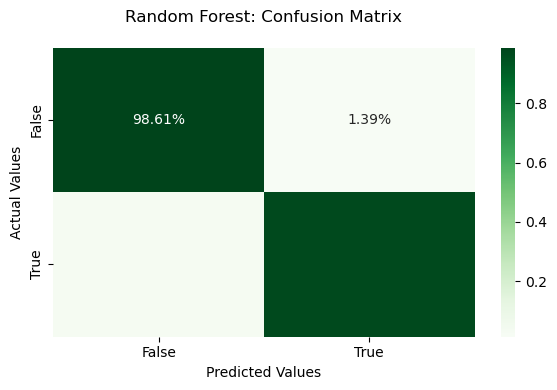

Model accuracy for Random Forest: 98.06%

Tabel Hasil Prediksi Kelayakan UMKM:
                           Nama UMKM Prediksi Kelayakan
0                     Anak Raja Sawa     Layak Dibiayai
1             Gapoktan Kayuh Baimbai        Tidak Layak
2                       Galyna Heiwa        Tidak Layak
3  Kerajinan Anyaman Purun dan Ilung     Layak Dibiayai
4                         MEKAR TANI        Tidak Layak
5                       Galyna Heiwa        Tidak Layak
6                           Go Purun        Tidak Layak
7                               BMBN     Layak Dibiayai
8                    Danish Kitchen         Tidak Layak
9                 Rumah Kreasi Tomat        Tidak Layak


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

# Load Data
df = pd.read_excel('Profil UMKM_ML.xlsx')

# Binary mapping
binary_map = {'YA': 1, 'TIDAK': 0}
df['Badan Pengawas Obat dan Makanan (BPOM)'] = df['Badan Pengawas Obat dan Makanan (BPOM)'].map(binary_map)
df['Sertifikasi Halal MUI'] = df['Sertifikasi Halal MUI'].map(binary_map)
df['Memiliki Simpanan di Bank'] = df['Memiliki Simpanan di Bank'].map(binary_map)

# Handle missing values
df['Outstanding Pinjaman'] = df['Outstanding Pinjaman'].fillna(0)
df = df.dropna(subset=['Total Aset Dimiliki (Rp)'])

# Definisikan fitur dan target
model_columns = [
    'Badan Pengawas Obat dan Makanan (BPOM)',
    'Jumlah Tenaga Kerja(Orang)',
    'Total Produksi Dihasilkan',
    'Total Biaya Produksi (Rp)',
    'Total Pendapatan (Rp)',
    'Total Laba/Rugi (Rp)',
    'Total Aset Dimiliki (Rp)',
    'Memiliki Simpanan di Bank',
    'Outstanding Pinjaman',
    'Pinjaman Bank'
]

df = df.dropna(subset=model_columns)

# Define X and y
X = df[model_columns[:-1]]
y = df['Pinjaman Bank']
nama_umkm = df['Nama Klaster/ Usaha/ Kelompok Usaha']

# Split data
X_train, X_test, y_train, y_test, name_train, name_test = train_test_split(
    X, y, nama_umkm, test_size=0.3, random_state=42
)

# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

# Confusion Matrix
plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    confusion_matrix(y_test, y_pred_rf, normalize='true'),
    annot=True,
    fmt='.2%',
    cmap='Greens'
)
ax.set_title('Random Forest: Confusion Matrix\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.tight_layout()
plt.show()

accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
print(f'Model accuracy for Random Forest: {accuracy_rf}%')

# Tabel hasil prediksi kelayakan
result_df = pd.DataFrame({
    'Nama UMKM': name_test.values,
    'Prediksi Kelayakan': np.where(y_pred_rf == 1, 'Layak Dibiayai', 'Tidak Layak')
})

print("\nTabel Hasil Prediksi Kelayakan UMKM:")
print(result_df.head(10))

# Simpan output ke format excel
result_df.to_excel('Hasil_Prediksi_Kelayakan_UMKM_ori.xlsx', index=False)

#### Load data yang bersumber dari SIKEPANG

In [7]:
df = pd.read_excel('Profil UMKM_ML.xlsx')
print(df.shape)
df.head()

(342, 22)


,Periode,No. ID Ref,Nama Klaster/ Usaha/ Kelompok Usaha,Nama Ketua Kelompok/ Pengusaha,Jenis Usaha,Bentuk Badan Usaha,Badan Pengawas Obat dan Makanan (BPOM),Sertifikasi Halal MUI,HACCP,Standar Nasional Indonesia (SNI),...,Jumlah Tenaga Kerja(Orang),Sektor Ekonomi,Total Produksi Dihasilkan,Total Biaya Produksi (Rp),Total Pendapatan (Rp),Total Laba/Rugi (Rp),Total Aset Dimiliki (Rp),Memiliki Simpanan di Bank,Pinjaman Bank,Outstanding Pinjaman
0,2023-03-01,1067,Kerajinan Anyaman Purun dan Ilung,SOPIANOR,NON PERTANIAN,NaN,TIDAK,TIDAK,TIDAK,TIDAK,...,70,Sektor Industri Pengolahan (Manufaktur) : Anek...,6180.0,60564000,182000000.0,121436000.0,1.100000e+09,YA,1,62110000.0
1,2023-03-01,11,KLASTER PADI UNGGUL ORGANIK,Randam Purnomo,PERTANIAN,NaN,TIDAK,TIDAK,TIDAK,TIDAK,...,97,"Sektor Pertanian, Peternakan dan Perikanan",120428.0,215000000,756000000.0,541000000.0,2.250000e+09,YA,0,NaN
2,2023-03-01,11,KLASTER PADI UNGGUL ORGANIK,Randam Purnomo,PERTANIAN,NaN,TIDAK,TIDAK,TIDAK,TIDAK,...,85,"Sektor Pertanian, Peternakan dan Perikanan",28.0,50000000,241000000.0,191000000.0,1.250000e+09,YA,0,NaN
3,2023-03-01,1366,Klaster Udang Kotabaru,BEDDU,NON PERTANIAN,NaN,TIDAK,TIDAK,TIDAK,TIDAK,...,27,"Sektor Pertanian, Peternakan dan Perikanan",6000.0,115000000,600000000.0,485000000.0,8.000000e+08,YA,0,NaN
4,2023-03-01,1821,Rumah Kreasi Tomat,Dhianita Pratiwi,NON PERTANIAN,Perseorangan,TIDAK,YA,TIDAK,TIDAK,...,2,Sektor Industri Pengolahan (Manufaktur) : Indu...,3000.0,21000000,54000000.0,33000000.0,5.750000e+08,YA,0,NaN


#### Cleaning Data

In [8]:
# Binary mapping
binary_map = {'YA': 1, 'TIDAK': 0}
df['Badan Pengawas Obat dan Makanan (BPOM)'] = df['Badan Pengawas Obat dan Makanan (BPOM)'].map(binary_map)
df['Sertifikasi Halal MUI'] = df['Sertifikasi Halal MUI'].map(binary_map)
df['Memiliki Simpanan di Bank'] = df['Memiliki Simpanan di Bank'].map(binary_map)

# Handle missing values
df['Outstanding Pinjaman'] = df['Outstanding Pinjaman'].fillna(0)
df = df.dropna(subset=['Total Aset Dimiliki (Rp)'])

#### Model Specification

In [12]:
# Definisikan fitur dan target
model_columns = [
    'Badan Pengawas Obat dan Makanan (BPOM)',
    'Jumlah Tenaga Kerja(Orang)',
    'Total Produksi Dihasilkan',
    'Total Biaya Produksi (Rp)',
    'Total Pendapatan (Rp)',
    'Total Laba/Rugi (Rp)',
    'Total Aset Dimiliki (Rp)',
    'Memiliki Simpanan di Bank',
    'Outstanding Pinjaman',
    'Pinjaman Bank'
]

df = df.dropna(subset=model_columns)

# Define X and y
X = df[model_columns[:-1]]
y = df['Pinjaman Bank']
nama_umkm = df['Nama Klaster/ Usaha/ Kelompok Usaha']

# Split data
X_train, X_test, y_train, y_test, name_train, name_test = train_test_split(
    X, y, nama_umkm, test_size=0.3, random_state=42
)

# Fit Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

#### Output - Confusion Matrix & Model Accuracy

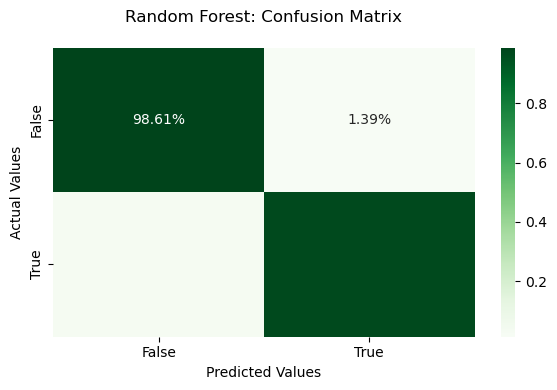

Model accuracy for Random Forest: 98.06%
Validation error for Random Forest model is 1.94 %


In [13]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
ax = sns.heatmap(
    confusion_matrix(y_test, y_pred_rf, normalize='true'),
    annot=True,
    fmt='.2%',
    cmap='Greens'
)
ax.set_title('Random Forest: Confusion Matrix\n')
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])
plt.tight_layout()
plt.show()

accuracy_rf = round(accuracy_score(y_test, y_pred_rf) * 100, 2)
print(f'Model accuracy for Random Forest: {accuracy_rf}%')
# Validation error
validation_error = round((1 - accuracy_score(y_test, y_pred_rf)) * 100, 2)
print('Validation error for Random Forest model is', validation_error, '%')

In [11]:
# Tabel hasil prediksi kelayakan
result_df = pd.DataFrame({
    'Nama UMKM': name_test.values,
    'Prediksi Kelayakan': np.where(y_pred_rf == 1, 'Layak Dibiayai', 'Tidak Layak')
})

print("\nTabel Hasil Prediksi Kelayakan UMKM:")
print(result_df.head(10))

# Simpan output ke format excel
result_df.to_excel('Hasil_Prediksi_Kelayakan_UMKM_ori.xlsx', index=False)


Tabel Hasil Prediksi Kelayakan UMKM:
                           Nama UMKM Prediksi Kelayakan
0                     Anak Raja Sawa     Layak Dibiayai
1             Gapoktan Kayuh Baimbai        Tidak Layak
2                       Galyna Heiwa        Tidak Layak
3  Kerajinan Anyaman Purun dan Ilung     Layak Dibiayai
4                         MEKAR TANI        Tidak Layak
5                       Galyna Heiwa        Tidak Layak
6                           Go Purun        Tidak Layak
7                               BMBN     Layak Dibiayai
8                    Danish Kitchen         Tidak Layak
9                 Rumah Kreasi Tomat        Tidak Layak


**Note:** If we also want to use other method or algorithm, we can create another estimate.

# We can create more robust Model! Only if we have enough time :)